In [68]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
#importing and fixing os due to error on MKL dataleak.  Currently just annoying but this fixes it.  
import os
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

In [69]:
pres_gdp = pd.read_csv("president_gdp-94.csv")
# pres_bday = pd.read_csv("president_birthday-94.csv")
pres_terms = pd.read_csv("president_terms-94.csv",encoding="UTF-8") 
# pres_bday=pres_bday.drop("csvbase_row_id",axis=1)

In [70]:
## EXPAND YEAR OF TERMS PER LINE

# Create a new DataFrame that will contain the expanded rows
expanded_rows = []

# Iterate over each row and duplicate the data for each year between Start and Stop
for i, row in pres_terms.iterrows():
    for year in range(row['Start'], row['Stop']):
        row_data = row.to_dict()  # Convert row to a dictionary
        row_data['Year'] = year   # Add the expanded year to the dictionary
        expanded_rows.append(row_data)


# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Display the DataFrame (this would save to a file or display the result in your environment)
#expanded_df.to_csv('expanded_president_list.csv', index=False)

#print(expanded_df)
expanded_df.head(10)
# expanded_df.tail(10)

,Start,Stop,Name,VP,BDay,BMonth,BYear,sign,Year
0,1789,1797,George Washington,John Adams,22,2,1732,Pisces,1789
1,1789,1797,George Washington,John Adams,22,2,1732,Pisces,1790
2,1789,1797,George Washington,John Adams,22,2,1732,Pisces,1791
3,1789,1797,George Washington,John Adams,22,2,1732,Pisces,1792
4,1789,1797,George Washington,John Adams,22,2,1732,Pisces,1793
5,1789,1797,George Washington,John Adams,22,2,1732,Pisces,1794
6,1789,1797,George Washington,John Adams,22,2,1732,Pisces,1795
7,1789,1797,George Washington,John Adams,22,2,1732,Pisces,1796
8,1797,1801,John Adams,Thomas Jefferson,30,10,1735,Scorpio,1797
9,1797,1801,John Adams,Thomas Jefferson,30,10,1735,Scorpio,1798


In [71]:
expanded_df = pd.merge(expanded_df,pres_gdp, on = "Year")

expanded_df.head()
expanded_df.tail()

,Start,Stop,Name,VP,BDay,BMonth,BYear,sign,Year,Party,...,Nominal GDP (million of Dollars),Real GDP (millions of 2017 dollars),GDP Deflator (index 2017=100),Population,Nominal GDP per capita (current dollars),Real GDP per capita (year 2017 dollars),GDP Growth,GDP Percent Growth,Population Growth,Population Percent Growth
231,2017,2021,Donald Trump,Mike Pence,14,6,1946,Gemini,2018,Republican,...,"20,656,516","20,193,900",102.29,"328,794,000","62,825.10","61,418.09",1,0.019,1,0.005
232,2017,2021,Donald Trump,Mike Pence,14,6,1946,Gemini,2019,Republican,...,"21,521,395","20,692,100",104.01,"330,513,000","65,115.12","62,606.01",0,-0.026,1,0.004
233,2017,2021,Donald Trump,Mike Pence,14,6,1946,Gemini,2020,Republican,...,"21,322,950","20,234,100",105.41,"331,800,000","64,266.79","60,985.03",1,0.056,1,0.002
234,2021,2023,Joseph Biden,Kamala Harris,20,11,1942,Scorpio,2021,Democrat,...,"23,594,031","21,407,700",110.22,"332,367,000","70,991.30","64,412.92",1,0.016,1,0.004
235,2021,2023,Joseph Biden,Kamala Harris,20,11,1942,Scorpio,2022,Democrat,...,"25,744,108","21,822,000",118.00,"333,568,000","77,171.74","65,414.65",1,0.020,1,0.005


In [72]:
## LABEL ENCODE PARTY HERE then make it a numerical, then use it in the Y
## THIS IS WHERE WE WOULD LABEL ENCODE HOROSCOPE AS WELL

# Set index to 'Year' and select columns for categorical_df
categorical_df = expanded_df[['Year','Name', 'VP','BDay', 'Party','sign', 'BMonth', 'GDP Growth', 'Population Growth']].set_index('Year')

# Select numerical columns for numerical_df
numerical_df = expanded_df[['Year','GDP Percent Growth', 'Population Percent Growth']].set_index('Year')

categorical_df.head(3)
# numerical_df



,Name,VP,BDay,Party,sign,BMonth,GDP Growth,Population Growth
Year,,,,,,,,
1789,George Washington,John Adams,22,Independent,Pisces,2,1,1
1790,George Washington,John Adams,22,Independent,Pisces,2,1,1
1791,George Washington,John Adams,22,Independent,Pisces,2,1,1


In [73]:
categorical_df = pd.get_dummies(categorical_df)
categorical_df.head(3)

,BDay,BMonth,GDP Growth,Population Growth,Name_Abraham Lincoln,Name_Andrew Jackson,Name_Andrew Johnson,Name_Barack Obama,Name_Benjamin Harrison,Name_Calvin Coolidge,...,sign_Cancer,sign_Capricorn,sign_Gemini,sign_Leo,sign_Libra,sign_Pisces,sign_Sagittarius,sign_Scorpio,sign_Taurus,sign_Virgo
Year,,,,,,,,,,,,,,,,,,,,,
1789,22,2,1,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1790,22,2,1,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1791,22,2,1,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [74]:
# MERGEM THEM THANGS
dummy_df = pd.merge(categorical_df,numerical_df, left_index=True, right_index=True)

dummy_df

# dummy_df.to_csv("dummy_df.csv")


,BDay,BMonth,GDP Growth,Population Growth,Name_Abraham Lincoln,Name_Andrew Jackson,Name_Andrew Johnson,Name_Barack Obama,Name_Benjamin Harrison,Name_Calvin Coolidge,...,sign_Gemini,sign_Leo,sign_Libra,sign_Pisces,sign_Sagittarius,sign_Scorpio,sign_Taurus,sign_Virgo,GDP Percent Growth,Population Percent Growth
Year,,,,,,,,,,,,,,,,,,,,,
1789,22,2,1,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,0.030,0.031
1790,22,2,1,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,0.029,0.030
1791,22,2,1,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,0.042,0.030
1792,22,2,1,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,0.048,0.030
1793,22,2,1,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,0.096,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,14,6,1,1,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,0.019,0.005
2019,14,6,0,1,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,-0.026,0.004
2020,14,6,1,1,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,0.056,0.002


In [75]:
# Exclude the columns in y from dummy_df3
# GDP
y = dummy_df[['sign_Gemini']]

# Define the target columns (y)
X = dummy_df.loc[:, ~dummy_df.columns.isin(y.columns)]



In [76]:
print(X.shape)  # Should be (n_samples, n_features)
print(y.shape)  # Should be (n_samples,) or (n_samples, 1)

(240, 108)
(240, 1)


In [77]:
# Split the preprocessed data into a training and testing dataset -- choose to stratify so that the classes are more balanced out bc it's a small dataset and imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=42)


In [78]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [79]:


# Initialize a multi-output classifier with logistic regression
classifier = MultiOutputClassifier(LogisticRegression())

# Fit the logistic regression model on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

#Tyler say -- list within list.... 

In [80]:
from sklearn.metrics import accuracy_score
#accuracy score
accuracy_score(y_true= y_test, y_pred= y_pred)
#do training and test scores

0.9583333333333334

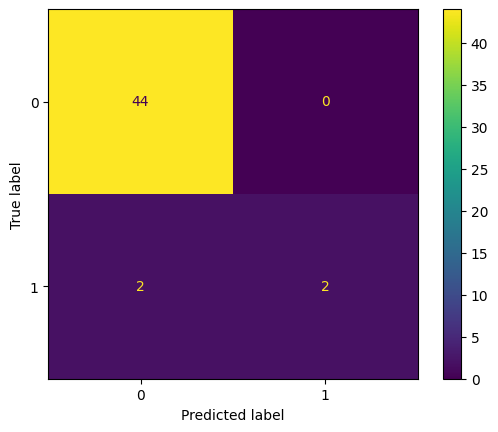

In [81]:

cm_df = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred))

cm_df

disp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred))
disp.plot()


In [82]:
importances = []
for i, estimator in enumerate(classifier.estimators_):
    # Get the absolute values of the coefficients
    abs_importances = abs(estimator.coef_[0])  # or np.abs(estimator.coef_[0])
    
    importances.append(pd.DataFrame({
        'feature': X_train.columns,  # assuming X_train is a DataFrame
        'importance': abs_importances,  # use absolute value of coefficients
        'output_class': i
    }))

# Combine all feature importances into one DataFrame
df_importance = pd.concat(importances).sort_values(by='importance', ascending=False)

# Display the top 10 most important features (absolute importance)
df_importance.head(10)

,feature,importance,output_class
15,Name_George Bush,2.277841,0
78,VP_Richard Cheney,1.395161,0
73,VP_Lyndon B. Johnson,1.212078,0
27,Name_John Kennedy,1.212078,0
75,VP_Mike Pence,1.064978,0
11,Name_Donald Trump,1.064978,0
53,VP_Dan Quayle,0.882680,0
93,Party_Republican,0.861192,0
87,VP_office vacant,0.750995,0
95,sign_Aquarius,0.691334,0


In [83]:
# Print the classification report for the model
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98        44
        True       1.00      0.50      0.67         4

    accuracy                           0.96        48
   macro avg       0.98      0.75      0.82        48
weighted avg       0.96      0.96      0.95        48

